In [1]:
import os
import csv
import string
import json
import ast

In [24]:
json_list=os.listdir('Task1_Results/')

In [25]:
count_dict={}
count_dict['Integer']=0
count_dict['Float']=0
count_dict['String']=0
count_dict['Date']=0
count_dict['String/Date']=0
count_dict['String/Integer']=0
count_dict['String/Float']=0

In [29]:

def process_file(contents):
    for c in contents[1:]:
        try:
            d=ast.literal_eval(c)
        except:
            continue
        type_l=[]
        for x in d['data_types']:
            type_l.append(x['type'])
        if 'TEXT' in type_l and "DATE/TIME" in type_l:
            count_dict['String/Date']=count_dict['String/Date']+1
        if 'TEXT' in type_l and 'INTEGER (LONG)' in type_l:
            count_dict['String/Integer']=count_dict['String/Integer']+1
        if 'TEXT' in type_l and 'REAL' in type_l:
            count_dict['String/Float']=count_dict['String/Float']+1
        for t in type_l:
            if t=='TEXT':
                count_dict['String']=count_dict['String']+1
            elif t=='DATE/TIME':
                count_dict['Date']=count_dict['Date']+1
            elif t=='REAL':
                count_dict['Float']=count_dict['Float']+1
            elif t=='INTEGER (LONG)':
                count_dict['Integer']=count_dict['Integer']+1

In [30]:
for j in json_list:
    file=open('Task1_Results/'+j)
    contents=file.read()
    contents=contents.replace("}{", "}kill_me{")
    contents=contents.split("kill_me")
    process_file(contents)

In [31]:
print(count_dict)

{'Integer': 14613, 'Float': 10231, 'String': 18460, 'Date': 7516, 'String/Date': 7516, 'String/Integer': 5098, 'String/Float': 5904}


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [33]:
x=pd.DataFrame(list(count_dict.items())).copy()

In [34]:
x.index=count_dict.keys()

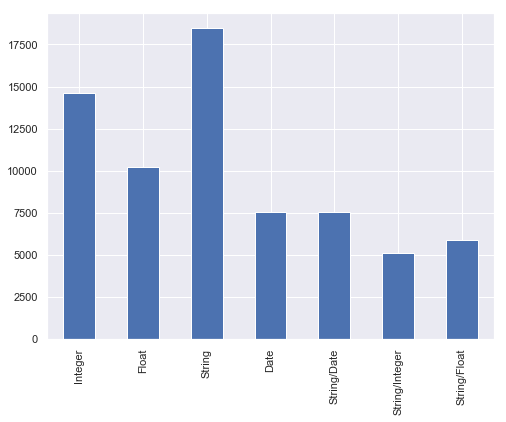

In [35]:
x.plot(kind='bar', legend=False, figsize=(8, 6))